<a href="https://colab.research.google.com/github/norayehia/DeeplearngvsMl-breastcancer/blob/main/cancerml%26Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/drive/MyDrive/help/training/Amitdepi/Ml\Dl/Untitled folder (1)/cancer.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

*Preprocessing*

Check for Missing Values: Identify if there are any missing values in your dataset.

In [ ]:
data.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data= data.dropna()  # Dropping rows with missing values
# or
#df.fillna(df.mean(), inplace=True)  # Impute missing values with column mean


Feature Selection/Engineering:

    Drop Irrelevant Columns: Columns like Unnamed: 32 which may be irrelevant should be dropped.

In [ ]:

# Remove two columns name is 'C' and 'D'
data =data.drop(['id', 'Unnamed: 32'], axis = 1)


Convert Categorical Data: Convert the diagnosis column from categorical ('M' and 'B') to numerical (0 and 1).



In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


Scaling Features:

    Standardize or Normalize Data: Scaling features helps in improving the performance of machine learning models.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = data.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)


In [ ]:
scaled_features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#visulize outlier

<Axes: >

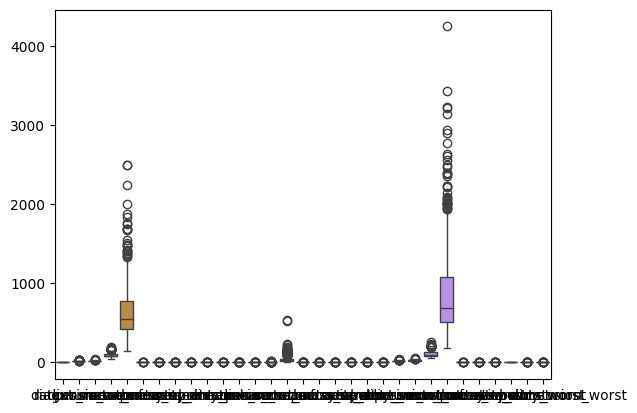

In [ ]:
import seaborn as sns
sns.boxplot(data=data)


#remove outlier

In [ ]:
# Calculate IQR for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a filter to remove outliers
filter = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the filter to the dataset
cleaned_data = data[filter]


In [ ]:
cleaned_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [ ]:
x=data.drop(['diagnosis'], axis = 1)
y=data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

training

In [ ]:
 from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
pred=clf.predict(X_test)

In [ ]:
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[120,   1],
       [  8,  59]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.99      0.96       121
     class 1       0.98      0.88      0.93        67

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



#anoter way

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your labels are in a list or an array
#labels = ["M", "M", "M", "M", ...]  # Your labels

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
numeric_labels = label_encoder.fit_transform(y)

# Print the numeric labels
print(numeric_labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(
    x, numeric_labels, test_size=0.33, random_state=42)

In [ ]:
clf = svm.SVC()
clf.fit(x_train, Y_train)

SVC()

In [ ]:
pred2=clf.predict(x_test)

In [ ]:
pred2

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred2)

array([[120,   1],
       [  8,  59]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.99      0.96       121
     class 1       0.98      0.88      0.93        67

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



In [ ]:
conf_matrix = confusion_matrix(Y_test, pred2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

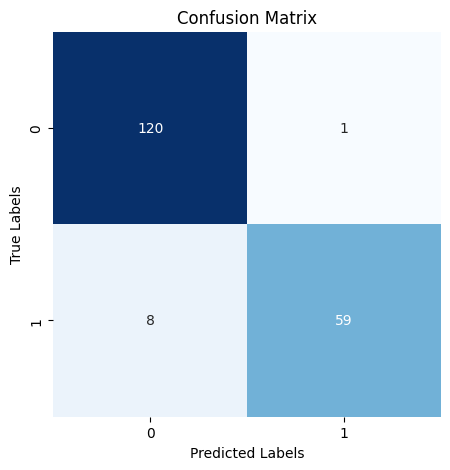

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Dl

In binary classification problems, you can use either `sigmoid` or `softmax` for the output layer. The choice depends on the specifics of your model architecture and loss function. Here’s why you might choose `softmax` in the context of your model:




### Summary

- **Softmax with 2 Output Units:** Suitable for binary classification and aligns with a multi-class approach, providing a probability distribution over 2 classes. Use `sparse_categorical_crossentropy` for the loss function.
- **Sigmoid with 1 Output Unit:** Typically used for binary classification, providing a single probability score. Use `binary_crossentropy` for the loss function.

Choosing between `softmax` and `sigmoid` can depend on your specific use case, personal preference, or consistency with other parts of your model or pipeline. Both are valid for binary classification, with `sigmoid` being the more straightforward option.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),  # Adjust input shape
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax'),  # Change to 2 units for binary classification
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
    metrics=['accuracy']
)


In the context of binary classification, you can use integer encoding (`0` and `1`) or categorical encoding (one-hot encoding) for your target labels. Here’s a detailed comparison to understand why you might use one over the other:

### 1. **Integer Encoding**

#### **When to Use:**
- **Binary Classification:** For binary classification problems (where there are only two classes), using integer encoding is simple and effective. The labels are typically encoded as `0` and `1`.

#### **How to Use:**
```python
y_train = y_train.astype(int)
y_test = y_test.astype(int)
```

#### **Advantages:**
- **Simpler Implementation:** You don’t need to transform the target labels into a one-hot encoded format.
- **Compatibility with `sigmoid`:** When using a single output unit with `sigmoid` activation for binary classification, the loss function is usually `binary_crossentropy`, which works with integer-encoded labels.

#### **Typical Usage:**
```python
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Single output unit for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

### 2. **Categorical Encoding**

#### **When to Use:**
- **Multi-class Classification:** For problems with more than two classes, categorical encoding (one-hot encoding) is more common. Each class label is represented as a binary vector.

#### **How to Use:**
```python
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
```

#### **Advantages:**
- **Suitable for Multi-class Classification:** When you have multiple classes, each class is represented by a binary vector where only the index corresponding to the class is set to `1`, and all others are `0`.

#### **Typical Usage:**
```python
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # `num_classes` output units for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

### Summary

- **For Binary Classification:**
  - **Integer Encoding:** Use integer encoding (0 and 1) and a single output unit with `sigmoid` activation.
  - **Loss Function:** `binary_crossentropy`.

- **For Multi-class Classification:**
  - **Categorical Encoding:** Use one-hot encoding and multiple output units with `softmax` activation.
  - **Loss Function:** `categorical_crossentropy`.

Choosing between these methods depends on the type of classification problem you're dealing with. For binary classification, integer encoding is straightforward and aligns well with the binary cross-entropy loss function. For multi-class problems, categorical encoding is essential for proper training and evaluation.

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [ ]:
y_train


172    1
407    0
56     1
497    0
301    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 381, dtype: int64

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
10/10 [==============================] - 2s 43ms/step - loss: 50.3689 - accuracy: 0.5000 - val_loss: 18.7732 - val_accuracy: 0.6494
Epoch 2/10
10/10 [==============================] - 0s 17ms/step - loss: 8.9021 - accuracy: 0.5658 - val_loss: 6.8952 - val_accuracy: 0.6883
Epoch 3/10
10/10 [==============================] - 0s 16ms/step - loss: 2.7222 - accuracy: 0.7039 - val_loss: 1.6605 - val_accuracy: 0.8182
Epoch 4/10
10/10 [==============================] - 0s 18ms/step - loss: 0.5635 - accuracy: 0.8816 - val_loss: 0.8049 - val_accuracy: 0.8831
Epoch 5/10
10/10 [==============================] - 0s 19ms/step - loss: 0.3587 - accuracy: 0.8882 - val_loss: 0.5413 - val_accuracy: 0.8831
Epoch 6/10
10/10 [==============================] - 0s 22ms/step - loss: 0.4630 - accuracy: 0.8750 - val_loss: 0.3677 - val_accuracy: 0.8831
Epoch 7/10
10/10 [==============================] - 0s 17ms/step - loss: 0.2678 - accuracy: 0.9013 - val_loss: 0.3799 - val_accuracy: 0.8312
Epoch 8/10


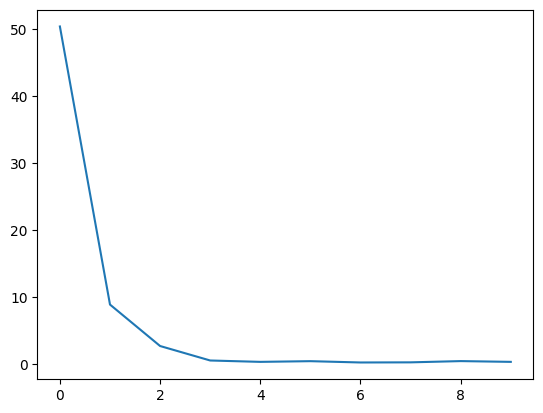

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

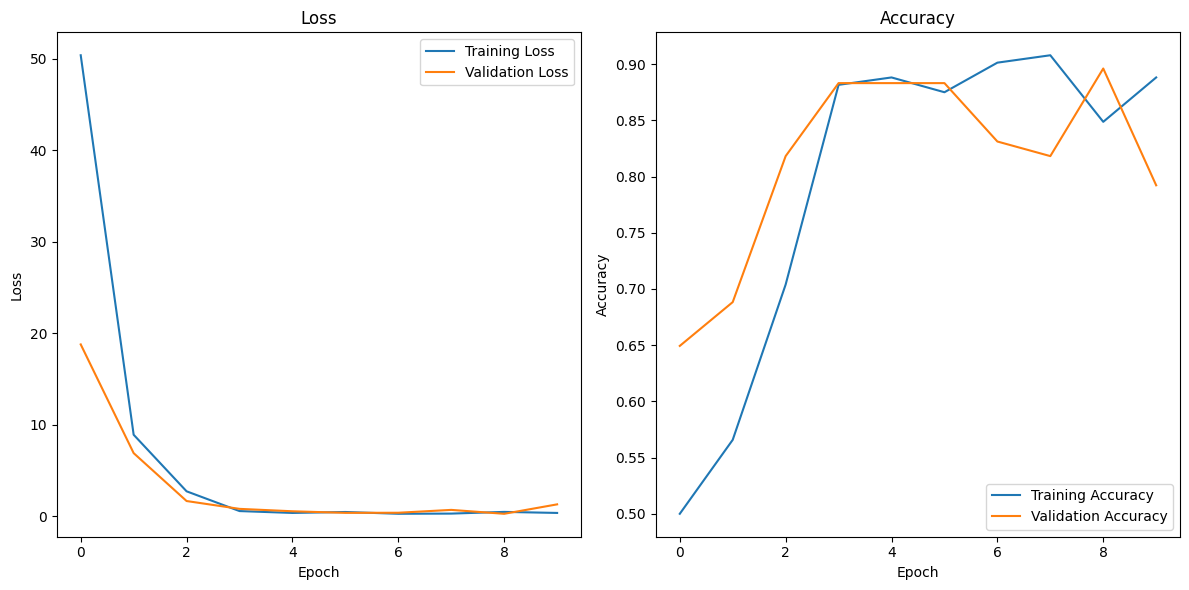

In [ ]:
import matplotlib.pyplot as plt

# Plot loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
if 'val_loss' in history_df.columns:
    plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history_df.columns:
    plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


6/6 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.8617
Test Accuracy: 0.8617


In [ ]:
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


6/6 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
y_pred_probs

array([[9.80250478e-01, 1.97495464e-02],
       [2.51687755e-08, 9.99999940e-01],
       [3.18535902e-02, 9.68146324e-01],
       [9.99937594e-01, 6.23693049e-05],
       [9.99736786e-01, 2.63318681e-04],
       [1.92207340e-02, 9.80779231e-01],
       [1.45401111e-06, 9.99998510e-01],
       [9.85116899e-01, 1.48830004e-02],
       [9.99919951e-01, 8.00152557e-05],
       [9.99835014e-01, 1.65102465e-04],
       [9.99881208e-01, 1.18745163e-04],
       [2.41143659e-01, 7.58856416e-01],
       [9.99944270e-01, 5.57215535e-05],
       [9.99346077e-01, 6.53905270e-04],
       [9.99731064e-01, 2.68985576e-04],
       [9.99878466e-01, 1.21448153e-04],
       [9.99928892e-01, 7.10570675e-05],
       [9.99493659e-01, 5.06228185e-04],
       [9.92207229e-01, 7.79279368e-03],
       [1.70263369e-02, 9.82973635e-01],
       [9.85796690e-01, 1.42031899e-02],
       [9.99416709e-01, 5.83147805e-04],
       [3.24055109e-05, 9.99967515e-01],
       [9.99285936e-01, 7.14166614e-04],
       [9.998490

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       121
           1       1.00      0.61      0.76        67

    accuracy                           0.86       188
   macro avg       0.91      0.81      0.83       188
weighted avg       0.89      0.86      0.85       188

Confusion Matrix:
[[121   0]
 [ 26  41]]


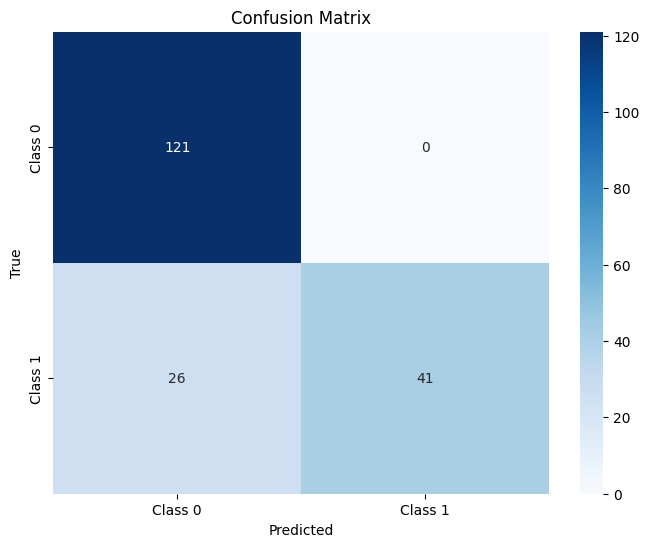

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
